In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/ht/dg47d7j9403_2cfbpk6nk1xr0000gn/T/ipykernel_12405/328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Week 13 Lab / Homework 10

Introduction:

On 4/12, we constructed a radiation detection device (with other features) using a Raspberry Pi, hat, a touchscreen interface, D3S and portable battery. Utilizing Pika software and data collection software, we utilized the sensors on our Raspberry Pi to detect temperature, PM levels, humidity, pressure, altitude and VOC, while we used the DS3 to detect radiation counts. 

Goal:

The goal of our lab was to determine if there was a difference in radiation due to location, specifically Jacobs and Soda Hall. 

Setup:

We measured data inside Jacobs Hall, outside Jacobs Hall and near Soda Hall, staying in an area for approximately 30 seconds, before moving to a new area approximately 10-30 meters away. We utilized the D3S detector for counts and our radiation detector was powered by a portable battery. Although we were supposed to utilize the GPS portion of our radiation detector's capabilities as well, we unfortunately did not have a detector to do so, thus being a minor setback in our data collection. We gathered data for about 10 minutes.

Analysis Summary:

First, I split the data into two parts; one part represents data gathered near Jacobs and the other part represents data gathered near Soda Hall. Next, I graphed plots that represent the counts, temperature and PM 2.5 for each part of the data, comparing them to time. Afterwards, I graph the distribution of these data points via histogram, then calculate the mean and standard deviation, to determine the consistency of the data points gathered. 

In [69]:
data1 = pd.read_csv('Loc1_session1_group1_2024-04-12_16-14-40.csv')
data1

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,1.712964e+09,0,0,32.8,0.0,1.0,1.4,27.152070,30.696679,997.647890,130.715612,108770.0
1,1.712964e+09,0,0,31.8,0.0,1.0,1.4,27.254180,29.994337,997.643963,130.748723,151000.8
2,1.712964e+09,0,0,34.0,0.0,1.0,1.2,27.254180,29.994337,997.643963,130.748723,151000.8
3,1.712964e+09,0,0,32.2,0.0,1.0,1.2,27.282109,29.434223,997.646231,130.729602,180307.2
4,1.712964e+09,0,0,33.8,0.0,1.0,1.0,27.334063,29.144571,997.652590,130.675984,201859.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,1.712964e+09,0,0,36.6,3.0,4.2,6.0,20.381523,38.929314,997.000298,136.176869,479541.2
123,1.712964e+09,0,0,35.4,3.0,4.2,6.0,20.522969,38.822706,996.991182,136.253758,481388.0
124,1.712964e+09,0,0,37.4,3.0,5.0,6.0,20.671680,38.618806,996.982229,136.329289,479406.8
125,1.712964e+09,0,0,37.4,3.0,5.0,6.0,20.833437,38.525118,996.984921,136.306579,475083.0


In [10]:
data1['Time'] = data1['Time']-data1['Time'].iloc[0]

In [11]:
data1

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,0.00,0,0,32.8,0.0,1.0,1.4,27.152070,30.696679,997.647890,130.715612,108770.0
1,4.93,0,0,31.8,0.0,1.0,1.4,27.254180,29.994337,997.643963,130.748723,151000.8
2,9.94,0,0,34.0,0.0,1.0,1.2,27.254180,29.994337,997.643963,130.748723,151000.8
3,14.92,0,0,32.2,0.0,1.0,1.2,27.282109,29.434223,997.646231,130.729602,180307.2
4,19.97,0,0,33.8,0.0,1.0,1.0,27.334063,29.144571,997.652590,130.675984,201859.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,609.95,0,0,36.6,3.0,4.2,6.0,20.381523,38.929314,997.000298,136.176869,479541.2
123,614.94,0,0,35.4,3.0,4.2,6.0,20.522969,38.822706,996.991182,136.253758,481388.0
124,619.97,0,0,37.4,3.0,5.0,6.0,20.671680,38.618806,996.982229,136.329289,479406.8
125,624.95,0,0,37.4,3.0,5.0,6.0,20.833437,38.525118,996.984921,136.306579,475083.0


In [14]:
pt1 = data1.loc[data1['Time']<315]
pt1

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,0.00,0,0,32.8,0.0,1.0,1.4,27.152070,30.696679,997.647890,130.715612,108770.0
1,4.93,0,0,31.8,0.0,1.0,1.4,27.254180,29.994337,997.643963,130.748723,151000.8
2,9.94,0,0,34.0,0.0,1.0,1.2,27.254180,29.994337,997.643963,130.748723,151000.8
3,14.92,0,0,32.2,0.0,1.0,1.2,27.282109,29.434223,997.646231,130.729602,180307.2
4,19.97,0,0,33.8,0.0,1.0,1.0,27.334063,29.144571,997.652590,130.675984,201859.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59,295.01,0,0,36.2,0.6,2.0,2.0,21.967852,35.056722,996.995223,136.219676,450821.6
60,299.92,0,0,31.2,0.6,2.0,2.0,21.872578,35.239767,996.979525,136.352097,451240.6
61,304.96,0,0,29.6,0.0,2.0,2.0,21.824805,35.374723,996.971791,136.417335,451119.6
62,309.93,0,0,28.4,0.0,2.0,2.0,21.794492,35.432830,996.962926,136.492117,453361.2


In [15]:
pt2 = data1.loc[data1['Time']>=315]
pt2

,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
64,319.93,0,0,28.4,0.0,2.0,2.0,21.594492,35.676738,996.972474,136.411576,455689.4
65,324.96,0,0,33.6,1.0,3.0,3.0,21.583125,35.754362,996.961031,136.508104,455754.8
66,329.93,0,0,29.4,1.0,3.0,3.0,21.610039,35.776909,996.963000,136.491495,456430.0
67,334.99,0,0,29.4,1.0,3.0,3.0,21.637305,35.798320,996.967991,136.449390,458415.2
68,339.93,0,0,25.0,1.0,3.0,3.0,21.698203,35.794736,996.978131,136.363852,457609.8
...,...,...,...,...,...,...,...,...,...,...,...,...
122,609.95,0,0,36.6,3.0,4.2,6.0,20.381523,38.929314,997.000298,136.176869,479541.2
123,614.94,0,0,35.4,3.0,4.2,6.0,20.522969,38.822706,996.991182,136.253758,481388.0
124,619.97,0,0,37.4,3.0,5.0,6.0,20.671680,38.618806,996.982229,136.329289,479406.8
125,624.95,0,0,37.4,3.0,5.0,6.0,20.833437,38.525118,996.984921,136.306579,475083.0


In [ ]:
# the data is split into: near jacobs hall v near soda hall

Text(0, 0.5, 'Counts')

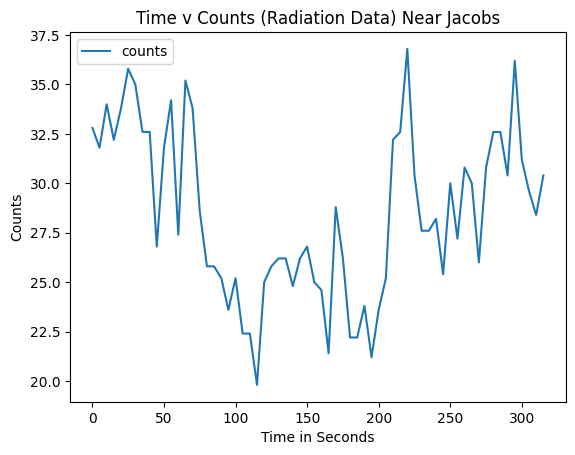

In [22]:
pt1.plot('Time', 'counts')
plt.title("Time v Counts (Radiation Data) Near Jacobs")
plt.xlabel("Time in Seconds")
plt.ylabel("Counts")

Text(0, 0.5, 'Temperature in Celsius')

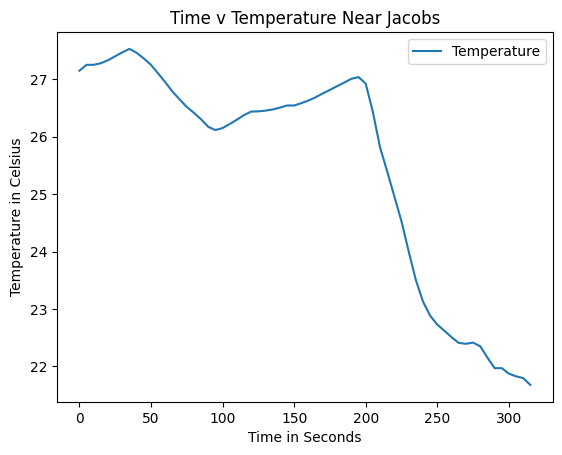

In [23]:
pt1.plot('Time', 'Temperature')
plt.title("Time v Temperature Near Jacobs")
plt.xlabel("Time in Seconds")
plt.ylabel("Temperature in Celsius")

Text(0, 0.5, 'PM 2.5')

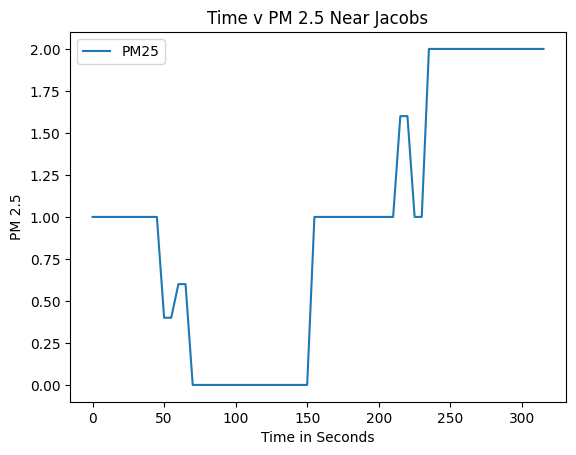

In [24]:
pt1.plot('Time', 'PM25')
plt.title("Time v PM 2.5 Near Jacobs")
plt.xlabel("Time in Seconds")
plt.ylabel("PM 2.5")

Text(0, 0.5, 'Counts')

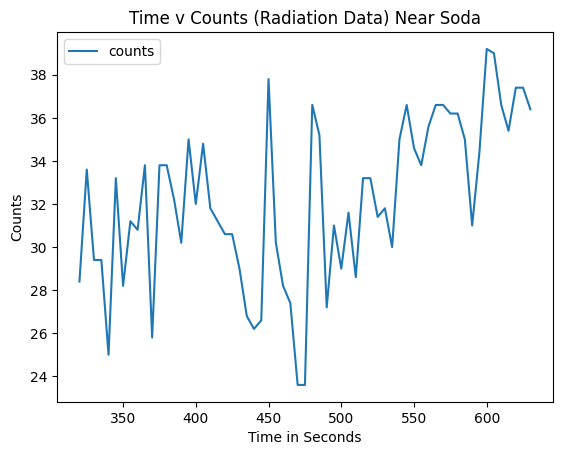

In [25]:
pt2.plot('Time', 'counts')
plt.title("Time v Counts (Radiation Data) Near Soda")
plt.xlabel("Time in Seconds")
plt.ylabel("Counts")

Text(0, 0.5, 'Temperature (in Celsius)')

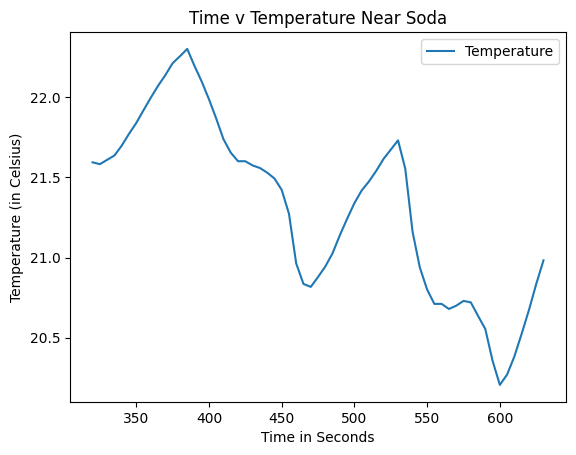

In [26]:
pt2.plot('Time', 'Temperature')
plt.title("Time v Temperature Near Soda")
plt.xlabel("Time in Seconds")
plt.ylabel("Temperature (in Celsius)")

Text(0, 0.5, 'PM25')

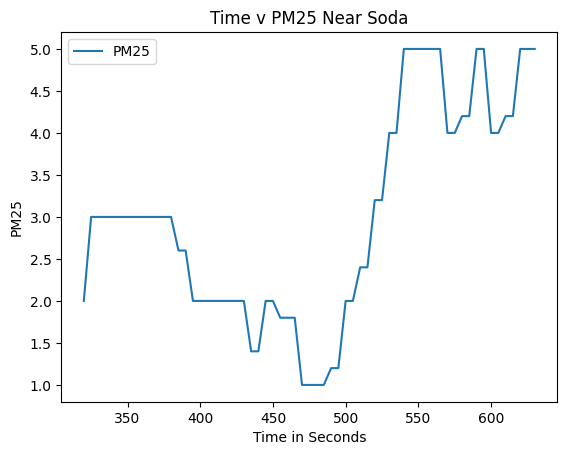

In [27]:
pt2.plot('Time', 'PM25')
plt.title("Time v PM25 Near Soda")
plt.xlabel("Time in Seconds")
plt.ylabel("PM25")

Text(0, 0.5, 'Count')

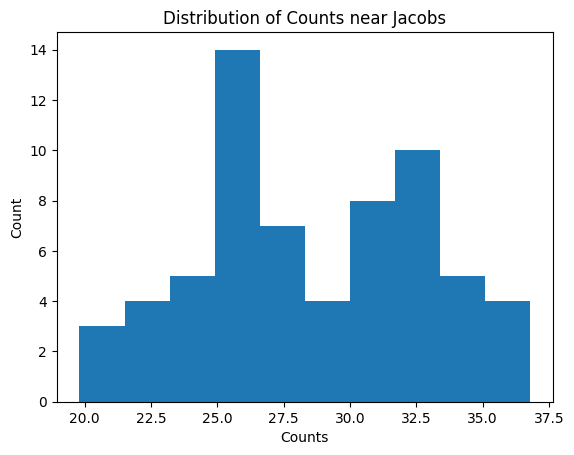

In [40]:
plt.hist(pt1['counts'])
plt.title("Distribution of Counts near Jacobs")
plt.xlabel("Counts")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

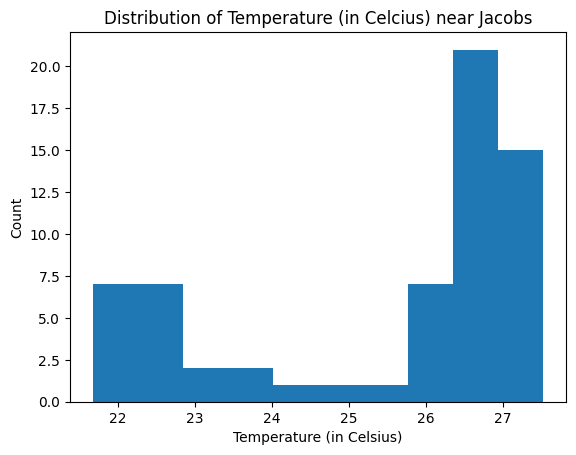

In [39]:
plt.hist(pt1['Temperature'])
plt.title("Distribution of Temperature (in Celcius) near Jacobs")
plt.xlabel("Temperature (in Celsius)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

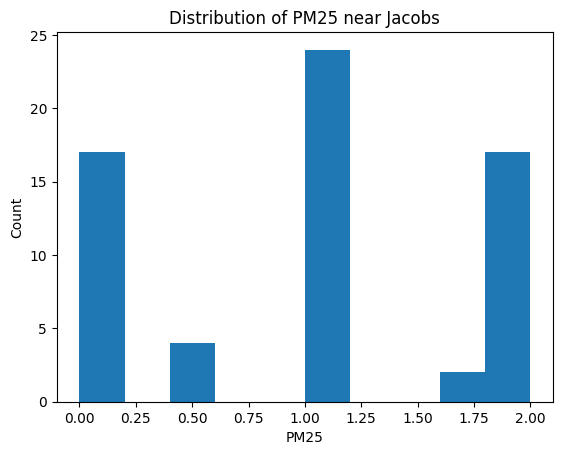

In [38]:
plt.hist(pt1['PM25'])
plt.title("Distribution of PM25 near Jacobs")
plt.xlabel("PM25")
plt.ylabel("Count")

In [41]:
jacob_counts_mean = np.mean(pt1['counts'])
jacob_temp_mean = np.mean(pt1['Temperature'])
jacob_pm25_mean = np.mean(pt1['PM25'])
print("Near Jacobs:")
print("The counts mean is ", jacob_counts_mean)
print("The temperature mean is", jacob_temp_mean)
print("The PM25 mean is", jacob_pm25_mean)

Near Jacobs:
The counts mean is  28.45
The temperature mean is 25.46674987792969
The PM25 mean is 0.9874999999999999


In [43]:
jacob_counts_std = np.std(pt1['counts'])
jacob_temp_std = np.std(pt1['Temperature'])
jacob_pm25_std = np.std(pt1['PM25'])
print("Near Jacobs:")
print("The counts std is ", jacob_counts_std)
print("The temperature std is", jacob_temp_std)
print("The PM25 std is", jacob_pm25_std)

Near Jacobs:
The counts std is  4.206096765410896
The temperature std is 1.9813114222103647
The PM25 std is 0.7473912964438374


Text(0, 0.5, 'Count')

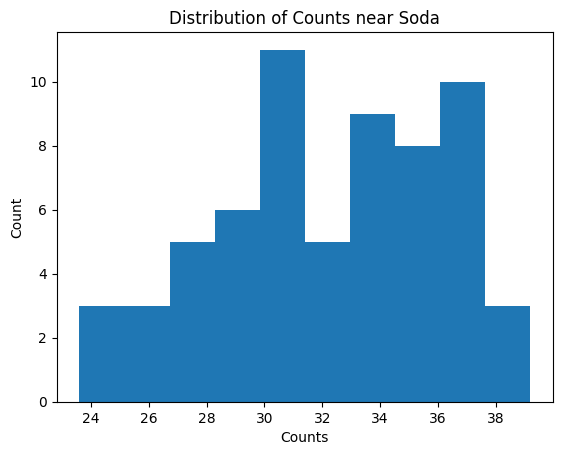

In [44]:
plt.hist(pt2['counts'])
plt.title("Distribution of Counts near Soda")
plt.xlabel("Counts")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

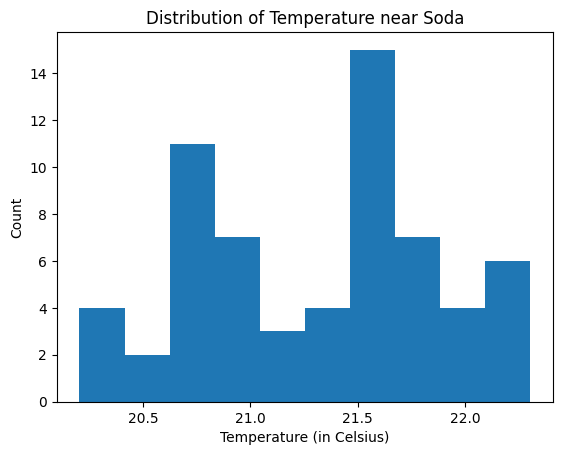

In [46]:
plt.hist(pt2['Temperature'])
plt.title("Distribution of Temperature near Soda")
plt.xlabel("Temperature (in Celsius)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

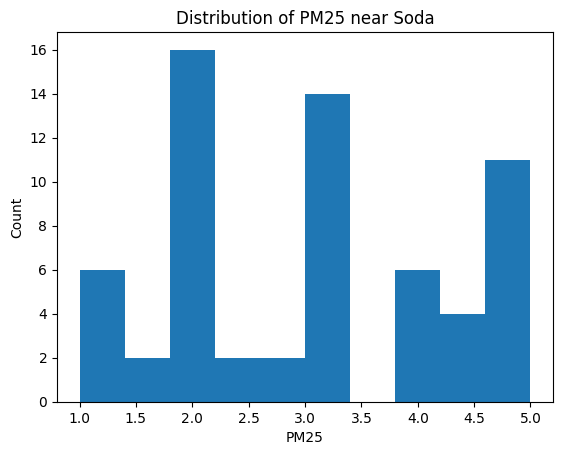

In [47]:
plt.hist(pt2['PM25'])
plt.title("Distribution of PM25 near Soda")
plt.xlabel("PM25")
plt.ylabel("Count")

In [48]:
soda_counts_mean = np.mean(pt2['counts'])
soda_temp_mean = np.mean(pt2['Temperature'])
soda_pm25_mean = np.mean(pt2['PM25'])
print("Near Soda:")
print("The counts mean is ", soda_counts_mean)
print("The temperature mean is", soda_temp_mean)
print("The PM25 mean is", soda_pm25_mean)

Near Soda:
The counts mean is  32.158730158730165
The temperature mean is 21.317340649801583
The PM25 mean is 2.996825396825396


In [49]:
soda_counts_std = np.std(pt2['counts'])
soda_temp_std = np.std(pt2['Temperature'])
soda_pm25_std = np.std(pt2['PM25'])
print("Near Soda:")
print("The counts std is ", soda_counts_std)
print("The temperature std is", soda_temp_std)
print("The PM25 std is", soda_pm25_std)

Near Soda:
The counts std is  3.8232635822356245
The temperature std is 0.5540551935597223
The PM25 std is 1.2711659756962108


In [50]:
print("This doesn't look like a normal distribution because I was walking around to different places. I did not follow Professor Hanks' amended instructions. Oops.")

This doesn't look like a normal distribution because I was walking around to different places. I did not follow Professor Hanks' amended instructions. Oops.


In [61]:
expected_variation1 = np.sqrt(len(pt1))
print("The expected variation/std of the data collected near Jacobs is", expected_variation1, "if we only consider counting statistics.")
print("The counts std is ", jacob_counts_std)

The expected variation of the data collected near Jacobs is 8.0 if we only consider counting statistics.
The counts std is  4.206096765410896


In [62]:
expected_variation2 = np.sqrt(len(pt2))
print("The expected variation/std of the data collected near Soda Hall is", expected_variation2, "if we only consider counting statistics.")
print("The counts std is ", soda_counts_std)

The expected variation of the data collected near Soda Hall is 7.937253933193772 if we only consider counting statistics.
The counts std is  3.8232635822356245


In [64]:
n = len(pt1)
uncertainty = np.sqrt(n)/(np.sqrt(2*np.sqrt(n)))
uncertainty

#this is the uncertainty of both since they both have an equal number of samples provided.

2.0

In [65]:
print("This doesn't seem to be an incredibly high uncertainty value, looking at our projected variation number determined solely by counting statistics.")

This doesn't seem to be an incredibly high uncertainty value, looking at our projected variation number determined solely by counting statistics.


In [66]:
print("The variation was not surprising. I believe that there are sources of radiation affecting the experiment's counts though. Too many people walked over to talk to Sean, skewing the data a bit, since humans are radioactive. When I moved to a new place, there were significantly less humans, thus lesser radiation perhaps? Inconsistency of human bodies is the bane of this experiment.")

The variation was not surprising. I believe that there are sources of radiation affecting the experiment's counts though. Too many people walked over to talk to Sean, skewing the data a bit, since humans are radioactive. When I moved to a new place, there were significantly less humans, thus lesser radiation perhaps? Inconsistency of human bodies is the bane of this experiment.


In [67]:
print("Looking at our mean and the uncertainty of the levels, I am confident that the areas near Jacobs and Soda Hall have statistically different radiation levels, with Soda having higher radiation levels. However, both values are safely under any dangerous thresholds, so both areas do not pose a threat to human health.")

Looking at our mean and the uncertainty of the levels, I am confident that the areas near Jacobs and Soda Hall have statistically different radiation levels, with Soda having higher radiation levels. However, both values are safely under any dangerous thresholds, so both areas do not pose a threat to human health.


Conclusion:

Overall, Soda Hall is a bit more radioactive than Jacobs Hall. However, the amount of radiation in both areas isn't significant enough to matter, since both levels are below any truly toxic levels. If somebody complains that a CS or engineering major reeks, just know that its not due to the radiation levels of those buildings... Its because they need to shower. 

However, I do wish to point to a few discrepancies/loose variables in the collection of data. First, the presence of humans was inconsistent throughout the experience, thus causing inconsistencies when it comes to the number of counts. Humans are radioactive; thus the more humans nearby the detector, the higher the counts will be. With 6 people near the radiation detector for a period of time near Jacobs Hall, this most likely impacted the number of counts recorded. Later, the radiation detector only traveled with one person, decreasing the amount of counts/radiation it was exposed to. Additionally, at the end, the radiation detector sat near plants/no humans for periods of time, also sitting on wooden benches... Could this have impacted the accuracy of our measurements? What about a passing person?

Although i think our data is accurate overall (despite lesser human interaction and presence near Soda Hall, Soda Hall still had overall higher radiation count levels), it is important to remember how variables can affect our data. Confounding variables are real and can impact our data; it is important to minimalize these variables to ensure the highest accuracy of the data collected. 